# The Sparks Foundation- Data Science and Business Analytics(Jan - 22) 

Task 1 : Prediction Using Supervised ML

In [4]:
#importing libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Reading the data

In [5]:
data = pd.read_csv("Book1.csv")

In [6]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
#Checking if any null values present in data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

Plotting Hours VS Percentage Score

Text(0, 0.5, 'Percentage Score')

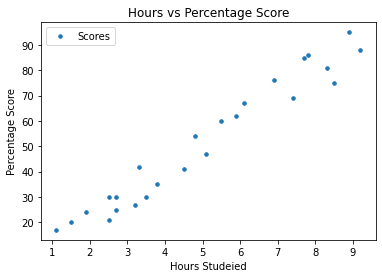

In [13]:
data.plot(x = "Hours", y = "Scores",style = ".",ms = 7)
plt.title("Hours vs Percentage Score")
plt.xlabel("Hours Studeied")
plt.ylabel("Percentage Score")

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

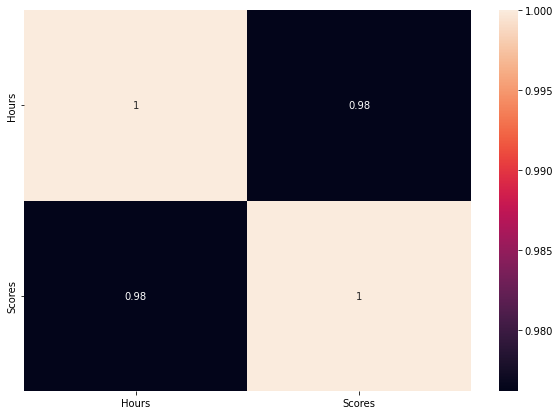

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot = True)

In [16]:
x = data.iloc[:,:1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
y = data.iloc[:,1:].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

# Creating the train and test data

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)


# Training the Model

In [20]:
model = LinearRegression()
model.fit(x_train,y_train)
print("----Model is Ready----")

----Model is Ready----


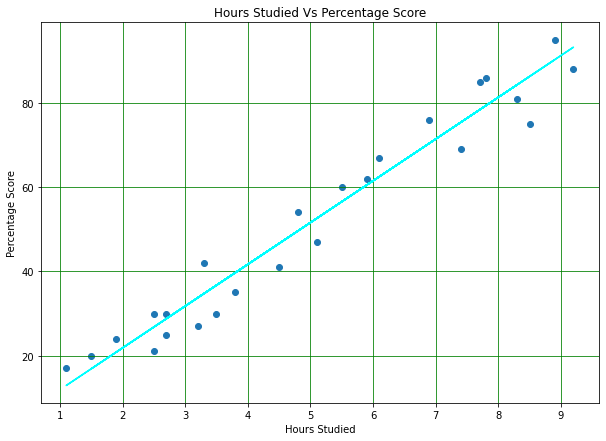

In [21]:
plt.figure(figsize=(10,7))
line = model.coef_*x + model.intercept_
plt.scatter(x,y)
plt.grid(color="green")
plt.title('Hours Studied Vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(x,line,label = 'best fit line',mec='black',color='cyan')
plt.show()


# Prediciting

In [22]:
y_pred=model.predict(x_test)

In [23]:
print("Accuracy :",model.score(x_test,y_test)*100)

Accuracy : 94.54906892105355


In [24]:
print("Actual:",y_test)

Actual: [[20]
 [27]
 [69]
 [30]
 [62]]


In [25]:
print("Predicted:",y_pred)

Predicted: [[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [26]:
print("Training Score:",model.score(x_train,y_train)*100)
print("Testing Score:",model.score(x_test,y_test)*100)

Training Score: 95.15510725211553
Testing Score: 94.54906892105355


# Plot of Hours V Score on the Train data

Text(0, 0.5, 'Percentage Score')

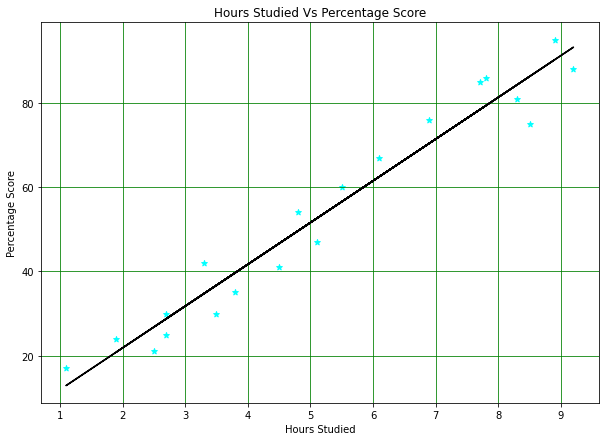

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,color='cyan',marker="*")
plt.plot(x_train,model.predict(x_train),color='black')
plt.title('Hours Studied Vs Percentage Score')
plt.grid(color="green")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

# Plot of Hours Vs Score on the Test data 

Text(0, 0.5, 'Percentage Score')

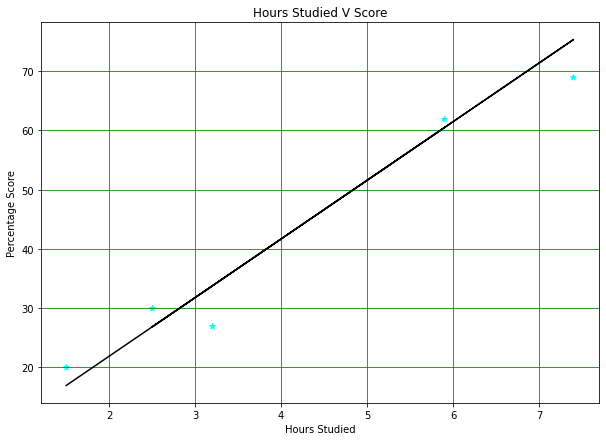

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_test,color='cyan',marker="*");
plt.plot(x_test,y_pred,color='black')
plt.grid(color="green")
plt.title('Hours Studied V Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

#  PREDICTION IF A STUDENT STUDIES FOR 9.25HRS

In [29]:
hours = 9.25
#Creating the test 
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print('-------------------------------')
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
-------------------------------
Predicted Score = [93.69173249]


Answer : If a student studies for about 9.25hrs, his/her predicted percentage score would be about 93.69

# Evaluation of model by calculating the mean squared error

In [30]:
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4.183859899002975
